In [4]:
# 04_barplot_feature_importance.py
## Author: Hayden Hedman
## Purpose: Portfolio-quality barplot showing feature importances from a decision tree regressor.

In [5]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
# Load in dataset from project folder
output_dir = os.path.join("..", "figures")
os.makedirs(output_dir, exist_ok=True)

# Cleaned + renamed features
feat_df = pd.DataFrame({
    "Feature": [
        "Post × Treated", 
        "Treatment Group", 
        "Post Period", 
        "User Age", 
        "Prior Engagement Score", 
        "User Gender (Female)"
    ],
    "Importance": [0.6623, 0.1793, 0.1528, 0.0056, 0.00005, 0.0]
}).sort_values("Importance", ascending=True)

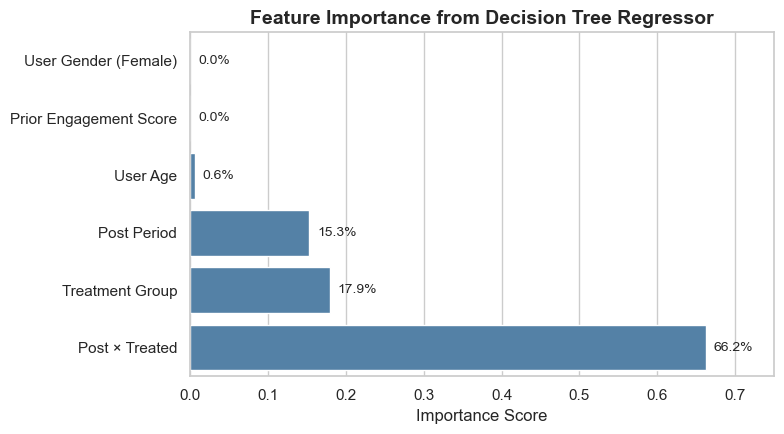

In [7]:
# Set plot style
sns.set(style="whitegrid")

# Create horizontal bar plot
plt.figure(figsize=(8, 4.5))
ax = sns.barplot(
    data=feat_df, 
    x="Importance", 
    y="Feature", 
    color="steelblue"  # avoids FutureWarning
)

# Add percentage labels to each bar
for i, (imp, feat) in enumerate(zip(feat_df["Importance"], feat_df["Feature"])):
    ax.text(imp + 0.01, i, f"{imp:.1%}", va="center", fontsize=10)

# Title and axis labels
ax.set_title("Feature Importance from Decision Tree Regressor", fontsize=14, weight="bold")
ax.set_xlabel("Importance Score", fontsize=12)
ax.set_ylabel("")

# Final layout and save
plt.xlim(0, 0.75)
plt.tight_layout()
output_path = os.path.join(output_dir, "feature_importance_barplot.png")
plt.savefig(output_path, dpi=300)
plt.show()